
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [15]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

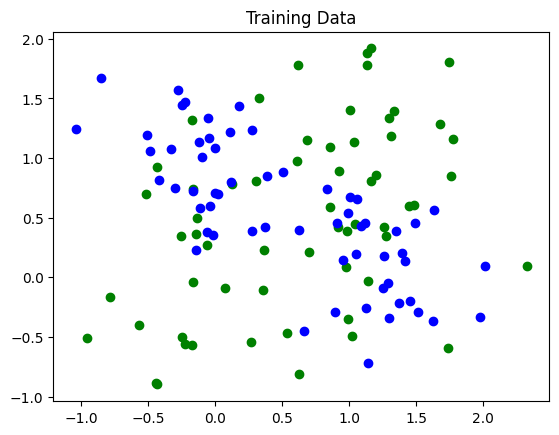

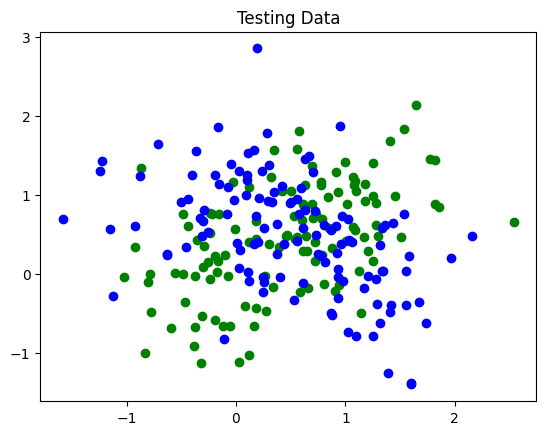

In [39]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1 = (0,0)
mean2 = (0,1)
mean3 = (1,0)
mean4 = (1,1)
cov = [[0.3, 0], [0, 0.3]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution




def getData(n, m) :
    '''
    Generates a training dataset of size n and a testing dataset of size m
    '''

    ds1 = np.random.multivariate_normal(mean1, cov, n+m)
    label1 = np.ones((n+m,1))
    ds2 = np.random.multivariate_normal(mean2, cov, n+m)
    label2 = np.ones((n+m,1))*-1
    ds3 = np.random.multivariate_normal(mean3, cov, n+m)
    label3 = np.ones((n+m,1))*-1
    ds4 = np.random.multivariate_normal(mean4, cov, n+m)
    label4 = np.ones((n+m,1))

    #Generate training data

    x_train = np.concatenate((ds1[:n],ds2[:n],ds3[:n],ds4[:n]),axis=0)
    y_train = np.concatenate((label1[:n],label2[:n],label3[:n],label4[:n]),axis=0)

    xy = np.concatenate((x_train,y_train),axis=1)
    np.random.shuffle(xy)

    x_train = xy[:,:2]
    y_train = xy[:,2:]


    #Generate testing data

    x_test = np.concatenate((ds1[n:],ds2[n:],ds3[n:],ds4[n:]),axis=0)
    y_test = np.concatenate((label1[n:],label2[n:],label3[n:],label4[n:]),axis=0)

    xy = np.concatenate((x_test,y_test),axis=1)
    np.random.shuffle(xy)

    x_test = xy[:,:2]
    y_test = xy[:,2:]

    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test = getData(30, 60)


#Visualize the data using plt.scatter() function

class1_train = []
class2_train = []
class1_test = []
class2_test = []
for i in range(len(x_train)) :
    if y_train[i] == 1 :
        class1_train.append(x_train[i])
    else :
        class2_train.append(x_train[i])

for i in range(len(x_test)) :
    if y_test[i] == 1 :
        class1_test.append(x_test[i])
    else :
        class2_test.append(x_test[i])

class1_train = np.array(class1_train)
class2_train = np.array(class2_train)
class1_test = np.array(class1_test)
class2_test = np.array(class2_test)

plt.title('Training Data')
plt.scatter(class1_train[:,0], class1_train[:,1],color='green')
plt.scatter(class2_train[:,0], class2_train[:,1],color='blue')
plt.show()

plt.title('Testing Data')
plt.scatter(class1_test[:,0], class1_test[:,1],color='green')
plt.scatter(class2_test[:,0], class2_test[:,1],color='blue')
plt.show()



Accuracy:  67.5


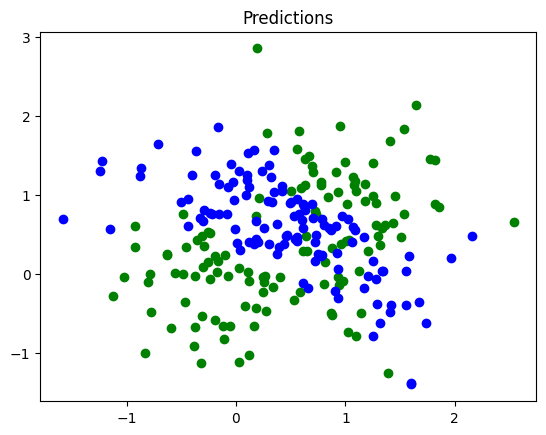

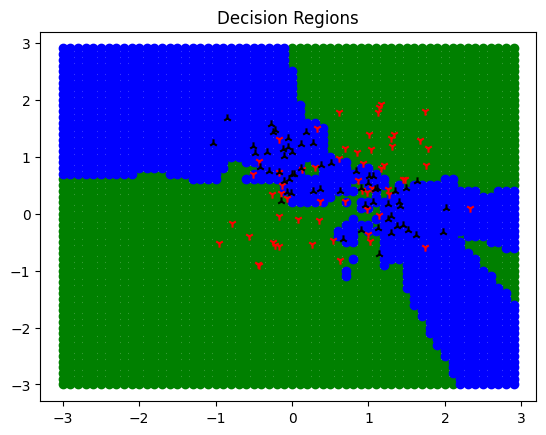

In [40]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  preds = []
  for x in X_test:
    distances = []
    for i in range(len(X_train)):
      dist = np.linalg.norm(X_train[i]-x)
      distances.append((dist,Y_train[i]))
    distances.sort()
    distances = distances[:k]
    counts = {}
    for i in distances:
      val = int(i[1])
      if val not in counts:
        counts[val] = 1
      else:
        counts[val] += 1
    counts = np.array(list(counts.items()))
    pred = -1
    mx = 0
    for i in counts:
      if i[1] > mx:
        mx = i[1]
        pred = i[0]
    preds.append(pred)
  return preds



#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''

  correct = 0
  tot = len(true)
  for i in range(tot):
    if true[i] == pred[i]:
      correct += 1
  return correct*100/tot




#Create a visual representation of predictions

predictions = kNNClassify(x_train,y_train,x_test,3)
print("Accuracy: ",KNNAccuracy(y_test,predictions))

class1 = []
class2 = []

for i in range(len(x_test)):
  if predictions[i] == 1:
    class1.append(x_test[i])
  else:
    class2.append(x_test[i])

class1 = np.array(class1)
class2 = np.array(class2)

plt.title("Predictions")
plt.scatter(class1[:,0],class1[:,1],color='green')
plt.scatter(class2[:,0],class2[:,1],color='blue')
plt.show()

#Generate and visualize the decision regions and overlay the test points

class1 = []
class2 = []

for i in range(60):
  for j in range(60):
    x = i/10 - 3
    y = j/10 - 3
    pred = kNNClassify(x_train,y_train,np.array([[x,y]]),3)[0]
    if pred == 1:
      class1.append([x,y])
    else:
      class2.append([x,y])

class1 = np.array(class1)
class2 = np.array(class2)

plt.title("Decision Regions")
plt.scatter(class1[:,0],class1[:,1],color='green')
plt.scatter(class2[:,0],class2[:,1],color='blue')
plt.scatter(class1_train[:,0], class1_train[:,1],color='red',marker='1')
plt.scatter(class2_train[:,0], class2_train[:,1],color='black',marker='2')
plt.show()




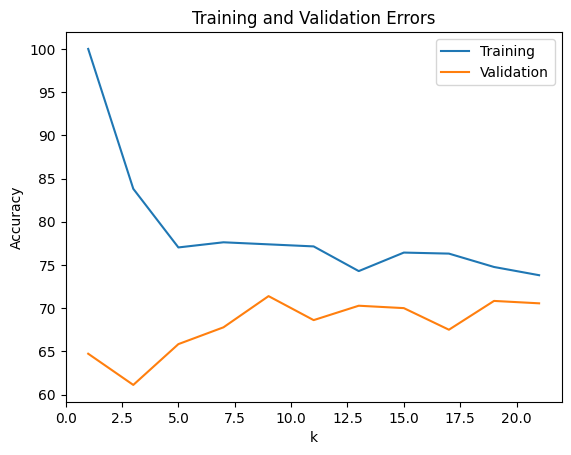

Best k:  9


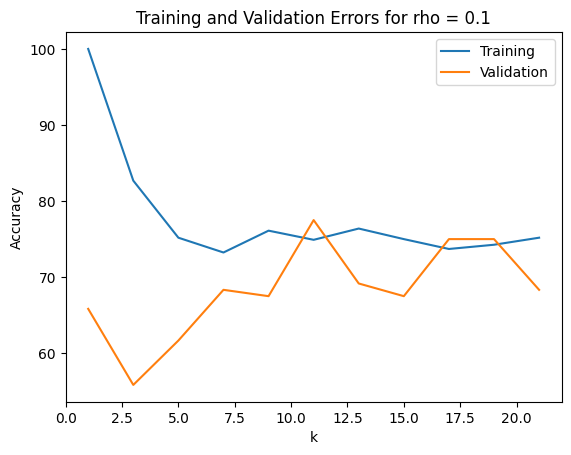

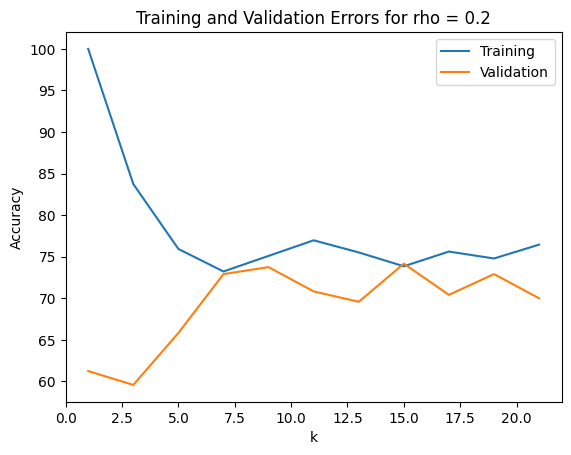

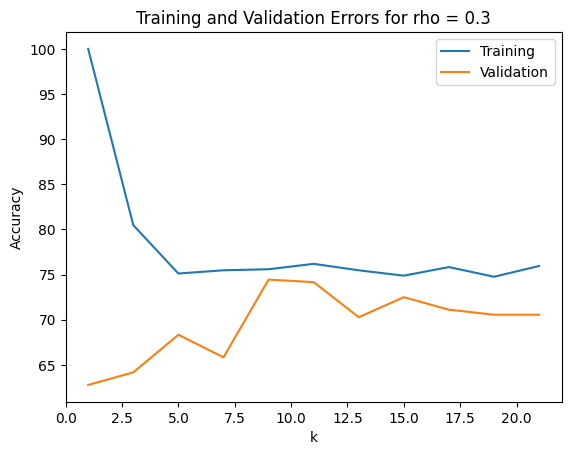

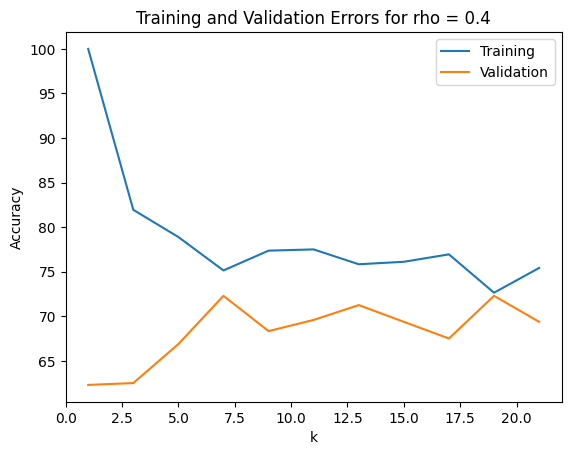

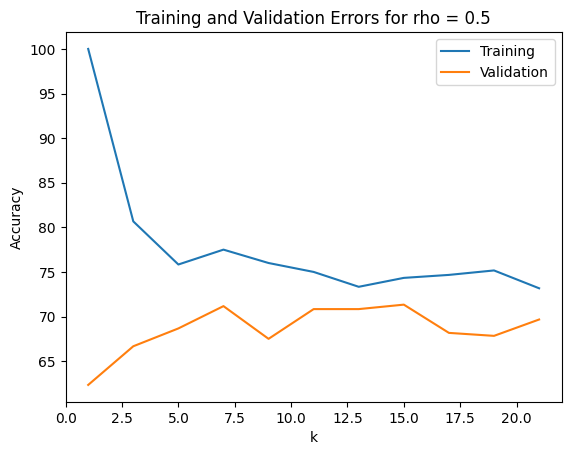

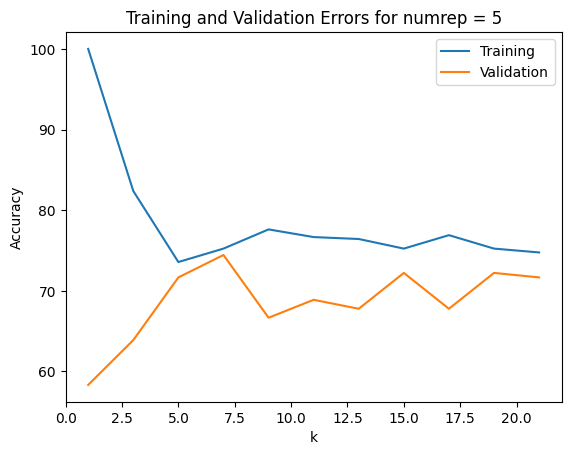

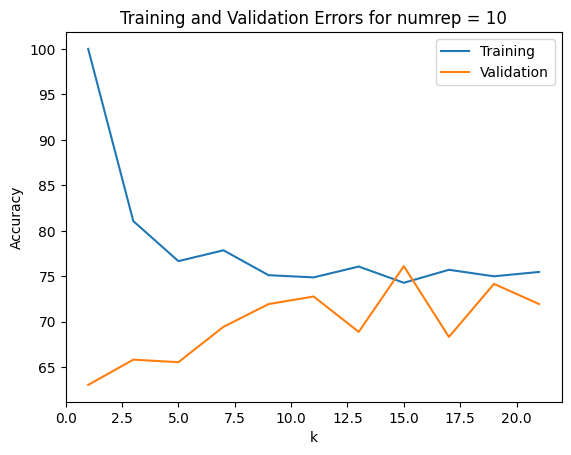

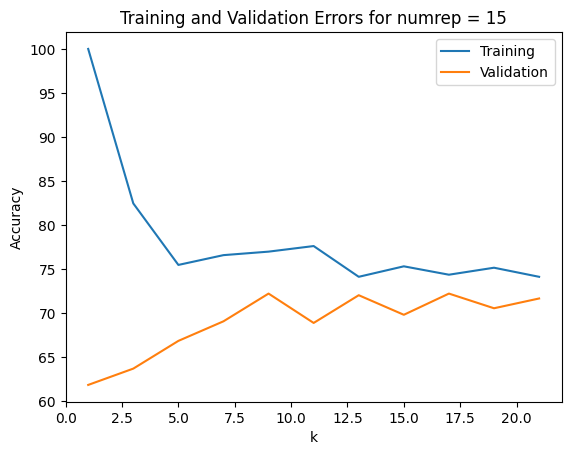

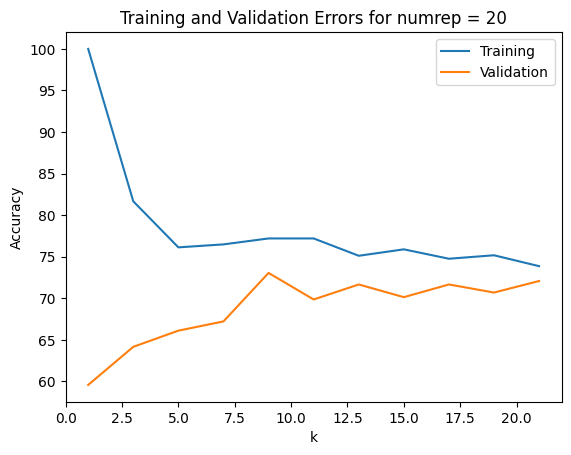

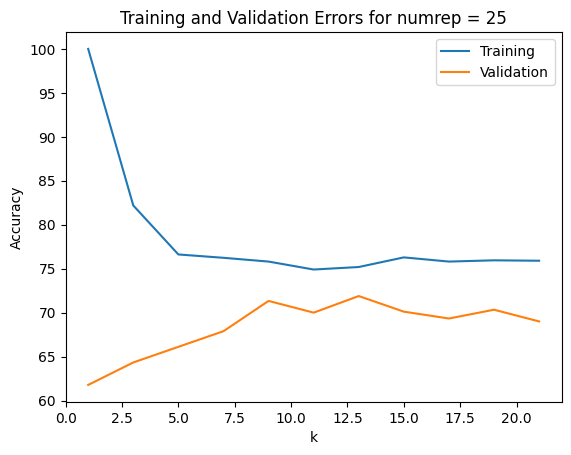

Accuracy:  66.66666666666667


In [41]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho):
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.

  sz = int(len(x_train)*(1-rho))
  accuracies_t = []
  accuracies_v = []
  for k in range(1, k_range+1, 2):
    accs_t = []
    accs_v = []
    for rep in range(numrep):
      xy = np.concatenate((x_train,y_train),axis=1)
      np.random.shuffle(xy)
      x_train1 = xy[:sz,:2]
      y_train1 = xy[:sz,2:]
      x_val = xy[sz:,:2]
      y_val = xy[sz:,2:]
      preds_t = kNNClassify(x_train1,y_train1,x_train1,k)
      preds_v = kNNClassify(x_train1,y_train1,x_val,k)
      accs_t.append(KNNAccuracy(y_train1,preds_t))
      accs_v.append(KNNAccuracy(y_val,preds_v))
    acc_t = np.mean(accs_t)
    acc_v = np.mean(accs_v)
    accuracies_t.append([acc_t,k])
    accuracies_v.append([acc_v,k])

  return accuracies_t, accuracies_v
  #Return errors on training and validation data



#Plot training and validation errors for different values of k

plt.title("Training and Validation Errors")
plt.xlabel("k")
plt.ylabel("Accuracy")
accuracies_t, accuracies_v = holdoutCVkNN(21,10,0.3)
accuracies_t = np.array(accuracies_t)
accuracies_v = np.array(accuracies_v)
plt.plot(accuracies_t[:,1],accuracies_t[:,0],label="Training")
plt.plot(accuracies_v[:,1],accuracies_v[:,0],label="Validation")
plt.legend()
plt.show()


#what is the best value for k?

best_k = int(accuracies_v[np.argmax(accuracies_v[:,0])][1])
print("Best k: ",best_k)


#Effect of rho and number repetations on k

#Effect of rho

for rho in [0.1,0.2,0.3,0.4,0.5]:
  accuracies_t, accuracies_v = holdoutCVkNN(21,10,rho)
  accuracies_t = np.array(accuracies_t)
  accuracies_v = np.array(accuracies_v)
  plt.title("Training and Validation Errors for rho = "+str(rho))
  plt.xlabel("k")
  plt.ylabel("Accuracy")
  plt.plot(accuracies_t[:,1],accuracies_t[:,0],label="Training")
  plt.plot(accuracies_v[:,1],accuracies_v[:,0],label="Validation")
  plt.legend()
  plt.show()

#Effect of number of repetations

for numrep in [5,10,15,20,25]:
  accuracies_t, accuracies_v = holdoutCVkNN(21,numrep,0.3)
  accuracies_t = np.array(accuracies_t)
  accuracies_v = np.array(accuracies_v)
  plt.title("Training and Validation Errors for numrep = "+str(numrep))
  plt.xlabel("k")
  plt.ylabel("Accuracy")
  plt.plot(accuracies_t[:,1],accuracies_t[:,0],label="Training")
  plt.plot(accuracies_v[:,1],accuracies_v[:,0],label="Validation")
  plt.legend()
  plt.show()


#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).


preds = kNNClassify(x_train,y_train,x_test,best_k)
print("Accuracy: ",KNNAccuracy(y_test,preds))



The best value of k is taken as the one for which model had highest accuracy on validation data.

A small rho may not be good representation of test data, but a large rho means we'll get less data to train on.

As the no. of repetitions increase, the fluctuatuion in validation data decreases.

Although the best value of k gave good validation accuracy, the accuracy on test data for this k is lower.

In [42]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

for n in [200, 400, 600, 800, 1000, 1200]:
  x_train,y_train,x_test,y_test = getData(n, 60)
  for k in [1,3,5,7,9,11,13,15,17,19,21]:
    preds = kNNClassify(x_train,y_train,x_test,k)
    print(f"Accuracy for training data size = {n} and k = {k}: ",KNNAccuracy(y_test,preds))




#Experiments with more difficult data set.

print("Higher Covariance")

cov = [[0.4, 0], [0, 0.4]]

for n in [200, 400, 600, 800, 1000, 1200]:
  x_train,y_train,x_test,y_test = getData(n, 60)
  for k in [1,3,5,7,9,11,13,15,17,19,21]:
    preds = kNNClassify(x_train,y_train,x_test,k)
    print(f"Accuracy for training data size = {n} and k = {k}: ",KNNAccuracy(y_test,preds))



Accuracy for training data size = 200 and k = 1:  62.5
Accuracy for training data size = 200 and k = 3:  65.83333333333333
Accuracy for training data size = 200 and k = 5:  69.16666666666667
Accuracy for training data size = 200 and k = 7:  69.16666666666667
Accuracy for training data size = 200 and k = 9:  71.25
Accuracy for training data size = 200 and k = 11:  69.16666666666667
Accuracy for training data size = 200 and k = 13:  67.08333333333333
Accuracy for training data size = 200 and k = 15:  66.25
Accuracy for training data size = 200 and k = 17:  67.08333333333333
Accuracy for training data size = 200 and k = 19:  67.5
Accuracy for training data size = 200 and k = 21:  67.08333333333333
Accuracy for training data size = 400 and k = 1:  65.83333333333333
Accuracy for training data size = 400 and k = 3:  68.75
Accuracy for training data size = 400 and k = 5:  70.0
Accuracy for training data size = 400 and k = 7:  70.41666666666667
Accuracy for training data size = 400 and k = 9: 

For bigger data set, and higher values of k, the model is able to reach upto 70% accuracy.

A good value for k can be chosen using cross validation.

As the variance increases and the dataset becomes more mixed up, we can see that accuracy decreases even for bigger dataset and k.

Accuracy for L1 distance:  71.66666666666667
Accuracy for L2 distance:  71.25


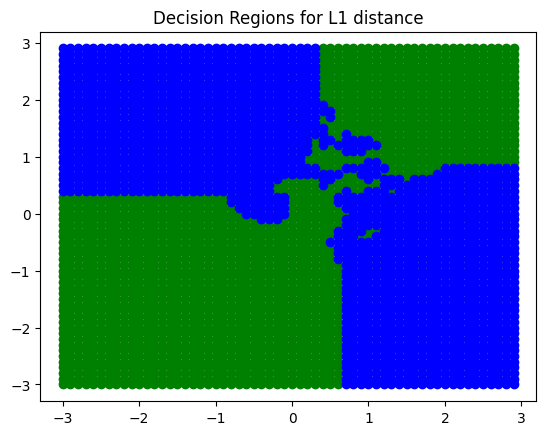

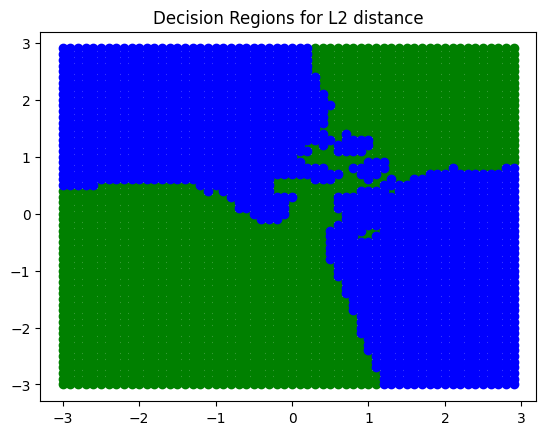

In [43]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures

cov = [[0.3, 0], [0, 0.3]]

# for l1 distance

def kNNClassifyL1(X_train,Y_train,X_test,k):
    '''
    #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
    #Outputs : Predicted class
    '''
    preds = []
    for x in X_test:
        distances = []
        for i in range(len(X_train)):
            dist = np.linalg.norm(X_train[i]-x,ord=1)
            distances.append((dist,Y_train[i]))
        distances.sort()
        distances = distances[:k]
        counts = {}
        for i in distances:
            val = int(i[1])
            if val not in counts:
                counts[val] = 1
            else:
                counts[val] += 1
        counts = np.array(list(counts.items()))
        pred = -1
        mx = 0
        for i in counts:
            if i[1] > mx:
                mx = i[1]
                pred = i[0]
        preds.append(pred)
    return preds


x_train,y_train,x_test,y_test = getData(30, 60)

predictions = kNNClassifyL1(x_train,y_train,x_test,3)
print("Accuracy for L1 distance: ",KNNAccuracy(y_test,predictions))

preds = kNNClassify(x_train,y_train,x_test,3)
print("Accuracy for L2 distance: ",KNNAccuracy(y_test,preds))




#Understand the decision regions of KNN classifier with different distance measures

class1_l1 = []
class2_l1 = []

for i in range(60):
  for j in range(60):
    x = i/10 - 3
    y = j/10 - 3
    pred = kNNClassifyL1(x_train,y_train,np.array([[x,y]]),3)[0]
    if pred == 1:
        class1_l1.append([x,y])
    else:
        class2_l1.append([x,y])

class1_l1 = np.array(class1_l1)
class2_l1 = np.array(class2_l1)

class1_l2 = []
class2_l2 = []

for i in range(60):
    for j in range(60):
        x = i/10 - 3
        y = j/10 - 3
        pred = kNNClassify(x_train,y_train,np.array([[x,y]]),3)[0]
        if pred == 1:
            class1_l2.append([x,y])
        else:
            class2_l2.append([x,y])

class1_l2 = np.array(class1_l2)
class2_l2 = np.array(class2_l2)

plt.title("Decision Regions for L1 distance")
plt.scatter(class1_l1[:,0],class1_l1[:,1],color='green')
plt.scatter(class2_l1[:,0],class2_l1[:,1],color='blue')
plt.show()

plt.title("Decision Regions for L2 distance")
plt.scatter(class1_l2[:,0],class1_l2[:,1],color='green')
plt.scatter(class2_l2[:,0],class2_l2[:,1],color='blue')
plt.show()




The decision region for L1 distance is comprised of more staright lines as compared to decision region for L2 distance.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


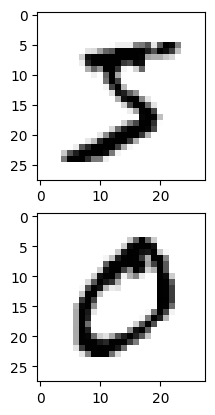

In [2]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

# Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits

images = images/255

img_targets = np.concatenate((images,targets.reshape(-1,1)),axis=1)
np.random.shuffle(img_targets)

#taking 1000 random images for experiment
img_targets = img_targets[:1000]

images = img_targets[:,:784]
targets = img_targets[:,784:]

len_train = int(0.9*len(images))
len_test = len(images) - len_train

x_train = images[:len_train]
y_train = targets[:len_train]

x_test = images[len_train:]
y_test = targets[len_train:]


In [4]:
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''

  correct = 0
  tot = len(true)
  for i in range(tot):
    if true[i] == pred[i]:
      correct += 1
  return correct*100/tot

#Write 'MultiClassKNNClassify' function

def MultiClassKNNClassifyL1(X_train,Y_train,X_test,k):
    '''
    #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
    #Outputs : Predicted class
    '''
    preds = []
    for x in X_test:
        distances = []
        for i in range(len(X_train)):
            dist = np.linalg.norm(X_train[i]-x,ord=1)
            distances.append((dist,Y_train[i]))
        distances.sort()
        distances = distances[:k]
        counts = {}
        for i in distances:
            val = int(i[1])
            if val not in counts:
                counts[val] = 1
            else:
                counts[val] += 1
        counts = np.array(list(counts.items()))
        pred = -1
        mx = 0
        for i in counts:
            if i[1] > mx:
                mx = i[1]
                pred = i[0]
        preds.append(pred)
    return preds

def HoldoutCVkNNL1(X_train,Y_train,k_range,numrep,rho):
    #Iterate through range of k values
        #Iterate through number of repetations
        #Hold out rho fraction of training data in each repetition.

    sz = int(len(X_train)*(1-rho))
    accuracies_t = []
    accuracies_v = []
    for k in range(3, k_range+1, 2):
        accs_t = []
        accs_v = []
        for rep in range(numrep):
            xy = np.concatenate((X_train,Y_train),axis=1)
            np.random.shuffle(xy)
            x_train1 = xy[:sz,:784]
            y_train1 = xy[:sz,784:]
            x_val = xy[sz:,:784]
            y_val = xy[sz:,784:]
            y_val = y_val.reshape(-1)
            y_val = y_val.astype(int)
            preds_t = MultiClassKNNClassifyL1(x_train1,y_train1,x_train1,k)
            preds_v = MultiClassKNNClassifyL1(x_train1,y_train1,x_val,k)
            accs_t.append(KNNAccuracy(y_train1,preds_t))
            accs_v.append(KNNAccuracy(y_val,preds_v))
        acc_t = np.mean(accs_t)
        acc_v = np.mean(accs_v)
        accuracies_t.append([acc_t,k])
        accuracies_v.append([acc_v,k])

    return accuracies_t, accuracies_v
    #Return errors on training and validation data

def MultiClassKNNClassifyL2(X_train,Y_train,X_test,k):
    '''
    #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
    #Outputs : Predicted class
    '''
    preds = []
    for x in X_test:
        distances = []
        for i in range(len(X_train)):
            dist = np.linalg.norm(X_train[i]-x)
            distances.append((dist,Y_train[i]))
        distances.sort()
        distances = distances[:k]
        counts = {}
        for i in distances:
            val = int(i[1])
            if val not in counts:
                counts[val] = 1
            else:
                counts[val] += 1
        counts = np.array(list(counts.items()))
        pred = -1
        mx = 0
        for i in counts:
            if i[1] > mx:
                mx = i[1]
                pred = i[0]
        preds.append(pred)
    return preds

def HoldoutCVkNNL2(X_train,Y_train,k_range,numrep,rho):
    #Iterate through range of k values
        #Iterate through number of repetations
        #Hold out rho fraction of training data in each repetition.

    sz = int(len(X_train)*(1-rho))
    accuracies_t = []
    accuracies_v = []
    for k in range(3, k_range+1, 2):
        accs_t = []
        accs_v = []
        for rep in range(numrep):
            xy = np.concatenate((X_train,Y_train),axis=1)
            np.random.shuffle(xy)
            x_train1 = xy[:sz,:784]
            y_train1 = xy[:sz,784:]
            x_val = xy[sz:,:784]
            y_val = xy[sz:,784:]
            y_val = y_val.reshape(-1)
            y_val = y_val.astype(int)
            preds_t = MultiClassKNNClassifyL2(x_train1,y_train1,x_train1,k)
            preds_v = MultiClassKNNClassifyL2(x_train1,y_train1,x_val,k)
            accs_t.append(KNNAccuracy(y_train1,preds_t))
            accs_v.append(KNNAccuracy(y_val,preds_v))
        acc_t = np.mean(accs_t)
        acc_v = np.mean(accs_v)
        accuracies_t.append([acc_t,k])
        accuracies_v.append([acc_v,k])

    return accuracies_t, accuracies_v
    #Return errors on training and validation data


#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.

accuracies_t_l1, accuracies_v_l1 = HoldoutCVkNNL1(x_train,y_train,11,3,0.1)
accuracies_t_l1 = np.array(accuracies_t_l1)
accuracies_v_l1 = np.array(accuracies_v_l1)
print("L1 Distance Validation Accuracy:")
print(accuracies_v_l1)

accuracies_t_l2, accuracies_v_l2 = HoldoutCVkNNL2(x_train,y_train,11,3,0.1)
accuracies_t_l2 = np.array(accuracies_t_l2)
accuracies_v_l2 = np.array(accuracies_v_l2)
print("L2 Distance Validation Accuracy:")
print(accuracies_v_l2)

# Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation

best_k_l1 = int(accuracies_v_l1[np.argmax(accuracies_v_l1[:,0])][1])
best_acc_l1 = accuracies_v_l1[np.argmax(accuracies_v_l1[:,0])][0]
print("Best k for L1: ",best_k_l1)
print("Best accuracy for L1: ",best_acc_l1)

best_k_l2 = int(accuracies_v_l2[np.argmax(accuracies_v_l2[:,0])][1])
best_acc_l2 = accuracies_v_l2[np.argmax(accuracies_v_l2[:,0])][0]
print("Best k for L2: ",best_k_l2)
print("Best accuracy for L2: ",best_acc_l2)

best_k = best_k_l1
if(best_acc_l2 > best_acc_l1):
    best_k = best_k_l2

#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    confusion_matrix = np.zeros((10,10))
    for i in range(len(true)):
        confusion_matrix[int(true[i])][int(pred[i])] += 1
    return confusion_matrix

confusion_matrix = compute_confusion_matrix(y_test,preds)
print("Confusion Matrix: ")
print(confusion_matrix)

L1 Distance Validation Accuracy:
[[84.81481481  3.        ]
 [87.40740741  5.        ]
 [82.96296296  7.        ]
 [84.44444444  9.        ]
 [81.48148148 11.        ]]
L2 Distance Validation Accuracy:
[[85.92592593  3.        ]
 [88.51851852  5.        ]
 [87.77777778  7.        ]
 [85.55555556  9.        ]
 [83.33333333 11.        ]]
Best k for L1:  5
Best accuracy for L1:  87.4074074074074
Best k for L2:  5
Best accuracy for L2:  88.51851851851852
Accuracy:  0.0
Confusion Matrix: 
[[ 8.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 13.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1. 10.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0. 16.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  6.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  3.  0.  5.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  3.  1.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  0.  4.]]


In [5]:
y_test = y_test.reshape(-1)
y_test = y_test.astype(int)
preds = MultiClassKNNClassifyL1(x_train,y_train,x_test,best_k)
print("Accuracy: ",KNNAccuracy(y_test,preds))


#Suggest an alternative ways to improve performance

Accuracy:  85.0


Some ways to improve performance can be:
1. Using more data
2. Using weighted KNN
3. Avoiding data imbalance

<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

4.

1. Best accuracy on synthetic data: 67.5 %

2. Best accuracy on MNIST data: 85.0

3. L2 norm performed better than L1 norm for MNIST dataset.  
  
  From confusion matrix:
  
  The matrix is diagonal dominant.
  
  There are a few misclassification between similar looking digits like 1 and 9.